In [1]:
from __future__ import division, print_function
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib import colors as mcolors
import matplotlib.pyplot as plt

def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

from shapely.geometry import Polygon, Point

def get_points_in_polygon(poly, n=1000):
    (minx, miny, maxx, maxy) = poly.bounds
    x = np.linspace(minx, maxx, n, endpoint=True)
    y = np.linspace(miny, maxy, n, endpoint=True)
    x, y = np.meshgrid(x,y)
    points = []
    for i, j in zip(x.flatten(), y.flatten()):
        p = Point(i,j)
        if poly.intersects(p):
            points.append([i,j])
    return points

def rotate(points, angle):
    alpha = angle *np.pi/180
    return np.dot(np.array([[np.cos(alpha), -np.sin(alpha)],[np.sin(alpha), np.cos(alpha)]]), points.T).T

In [2]:
%matplotlib nbagg

# Rovnoramenný úhelník L200x20

In [3]:
prurez = np.array([[-56.8, -56.8, -153.8],
                  [-56.8, 200-56.8, 187.6],
                  [-56.8+20, 200-56.8, 207.7],
                  [-56.8+20, -56.8+20, -99.6],
                  [200-56.8, -56.8+20, 80.7],
                  [200-56.8, -56.8, 46.5],
                  [-56.8, -56.8, -153.8]])
p = Polygon(prurez[:, :2])

points = get_points_in_polygon(p)
points = np.array(points)

<IPython.core.display.Javascript object>


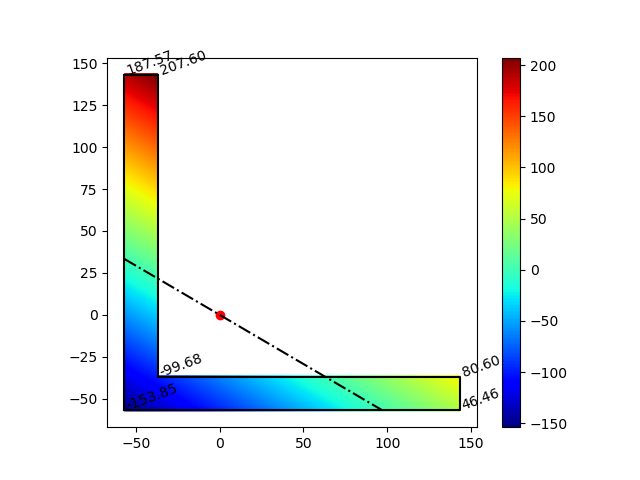

Text(-56.8, -56.8, '-153.85')

In [4]:
My = -22.6e-3
Mz = 22.6e-3
Iy = 45.3e-6
Iz = 11.8e-6

pnts = rotate(points, 90+45)
#pnts[:,1] *= -1
sigx = My/Iy*pnts[:,1]*1e-3 - Mz/Iz*pnts[:,0]*1e-3
plt.figure()
plt.plot(prurez[:, 0], prurez[:, 1], 'k-')
plt.plot(0,0, 'ro')
#plt.plot(points[:, 0], points[:,1], 'kx')
plt.scatter(points[:, 0], points[:, 1], c=sigx, cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5)
plt.plot([-56.8, 153.8/(46.5+153.8)*200-56.8],[153.8/(187.6+153.8)*200-56.8,-56.8],'k-.')
plt.colorbar()
plt.gca().set_aspect('equal')

fsigx = lambda y, z: My/Iy*z*1e-3 - Mz/Iz*y*1e-3

angle = 20

y, z = -56.8, 200-56.8
yr, zr = rotate(np.array([y, z]), 135)
plt.text(y, z, '{:.2f}'.format(fsigx(yr, zr)), rotation=angle)

y, z = -56.8+20, 200-56.8
yr, zr = rotate(np.array([y, z]), 135)
plt.text(y, z, '{:.2f}'.format(fsigx(yr, zr)), rotation=angle)

y, z = -56.8+20, -56.8+20
yr, zr = rotate(np.array([y, z]), 135)
plt.text(y, z, '{:.2f}'.format(fsigx(yr, zr)), rotation=angle)

y, z = 200-56.8, -56.8+20
yr, zr = rotate(np.array([y, z]), 135)
plt.text(y, z, '{:.2f}'.format(fsigx(yr, zr)), rotation=angle)

y, z = 200-56.8, -56.8
yr, zr = rotate(np.array([y, z]), 135)
plt.text(y, z, '{:.2f}'.format(fsigx(yr, zr)), rotation=angle)

y, z = -56.8, -56.8
yr, zr = rotate(np.array([y, z]), 135)
plt.text(y, z, '{:.2f}'.format(fsigx(yr, zr)), rotation=angle)

<IPython.core.display.Javascript object>


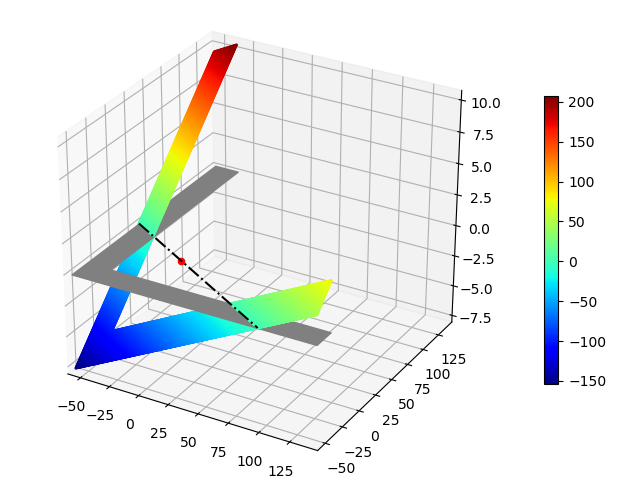

(-7.692362990453789, 10.37075246332339)

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
x = points[:, 0]
y = points[:, 1]
z = sigx/20

mask = sigx < 0
cm = ax.scatter(x[mask], y[mask], z[mask], c=sigx[mask], cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5, zorder=-10)
cm = ax.scatter(x[~mask], y[~mask], z[~mask], c=sigx[~mask], cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5, zorder=10)
plt.colorbar(cm, shrink=.6)
#ax.add_collection3d(Poly3DCollection([verts]), zs=sigx, zdir='x')

x = prurez[:, 0]
y = prurez[:, 1]
verts = list(zip(x,y,np.zeros_like(x)))
ax.add_collection3d(Poly3DCollection([verts], color='grey', zorder=0), zdir='x')

ax.scatter(0,0,0, c='r')
plt.plot([-56.8, 153.8/(46.5+153.8)*200-56.8],[153.8/(187.6+153.8)*200-56.8,-56.8],[0,0],'k-.', zorder=11)

ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())
ax.set_zlim(z.min(),z.max())

# Střešní vaznice I240

In [6]:
prurez = np.array([[48.65,13.1],
                   [0,13.1],
                   [0,0],
                   [106, 0],
                   [106, 13.1],
                   [57.35, 13.1],
                   [57.35,240-13.1],
                   [106,240-13.1],
                   [106,240-0],
                   [0, 240-0],
                   [0, 240-13.1],
                   [48.65, 240-13.1],
                   [48.65,13.1]])

prurez[:, 0] -= 106/2
prurez[:, 1] -= 240/2
p = Polygon(prurez)

points = get_points_in_polygon(p)
points = np.array(points)

<IPython.core.display.Javascript object>


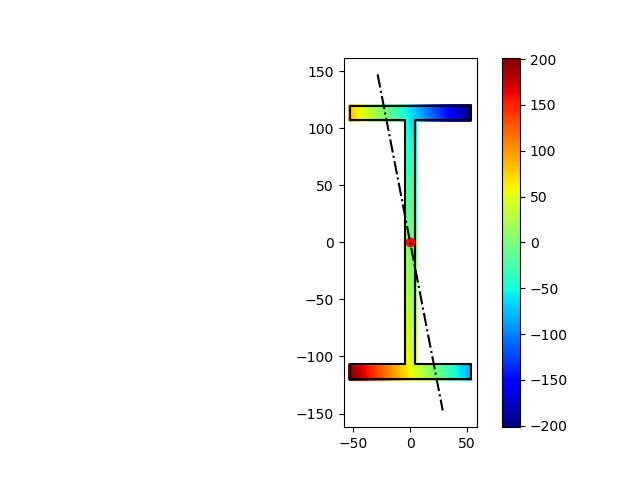

In [7]:
My = 21.73e-3
Mz = -5.82e-3
Iy = 42.4e-6
Iz = 2.2e-6

pnts = rotate(points, 180)

sigx = My/Iy*pnts[:,1]*1e-3 - Mz/Iz*pnts[:,0]*1e-3
plt.figure()
plt.plot(prurez[:, 0], prurez[:, 1], 'k-')
plt.plot(0,0, 'ro')
#plt.plot(points[:, 0], points[:,1], 'kx')
plt.scatter(points[:, 0], points[:, 1], c=sigx, cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5)
no = rotate(np.array([[-150, 0],[150, 0]]), np.arctan(Mz/My*Iy/Iz)*180/np.pi)
plt.plot(no[:,0], no[:,1],'k-.')
plt.colorbar()
plt.gca().set_aspect('equal')

<IPython.core.display.Javascript object>


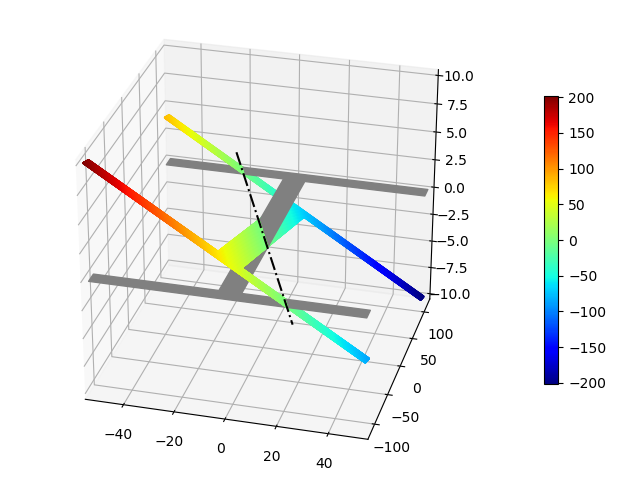

(-10.085454545454546, 10.085454545454546)

In [8]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(30, -75)
x = points[:, 0]
y = points[:, 1]
z = sigx/20

mask = sigx < 0
cm = ax.scatter(x[mask], y[mask], z[mask], c=sigx[mask], cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5, zorder=-10)
cm = ax.scatter(x[~mask], y[~mask], z[~mask], c=sigx[~mask], cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5, zorder=10)
plt.colorbar(cm, shrink=.6)
#ax.add_collection3d(Poly3DCollection([verts]), zs=sigx, zdir='x')
xx = prurez[:, 0]
yy = prurez[:, 1]
verts = list(zip(xx,yy,np.zeros_like(x)))
ax.add_collection3d(Poly3DCollection([verts], color='grey', zorder=0), zdir='x')
#ax.scatter(x, y, np.zeros_like(x), color='grey', s=.5, zorder=0)
ax.plot(no[:,0], no[:,1],[0,0],'k-.', zorder=11)
ax.scatter([0],[0],[0], c='r', s=20, zorder=12)

ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())
ax.set_zlim(z.min(),z.max())

<IPython.core.display.Javascript object>


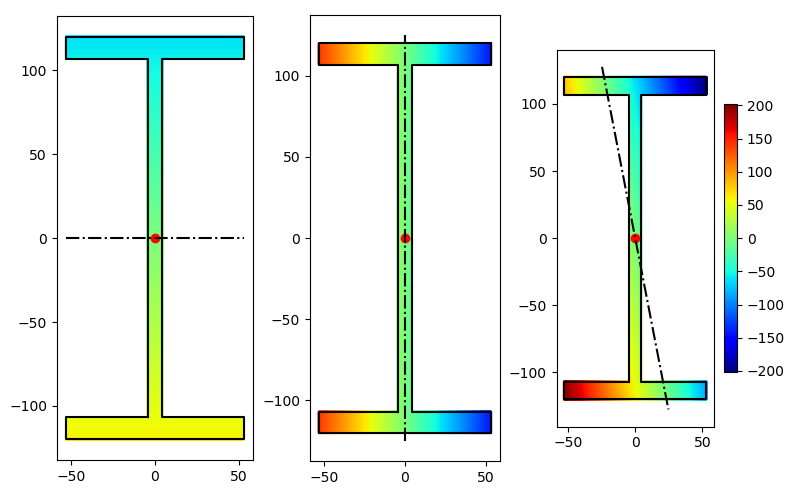

In [16]:
My = 21.73e-3
Mz = -5.82e-3
Iy = 42.4e-6
Iz = 2.2e-6

pnts = rotate(points, 180)

sigx = My/Iy*pnts[:,1]*1e-3 - Mz/Iz*pnts[:,0]*1e-3
sigx_y = My/Iy*pnts[:,1]*1e-3 
sigx_z = - Mz/Iz*pnts[:,0]*1e-3

fig, (ax_y, ax_z, ax) = plt.subplots(nrows=1, ncols=3, figsize=(8,5), tight_layout=True)

############ od Fz ################
ax_y.plot(prurez[:, 0], prurez[:, 1], 'k-')
ax_y.plot(0,0, 'ro')
#plt.plot(points[:, 0], points[:,1], 'kx')
ax_y.scatter(points[:, 0], points[:, 1], c=sigx_y, cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5)
ax_y.plot([-53, 53],[0, 0],'k-.')
ax_y.set_aspect('equal')

############ od Fy ################
ax_z.plot(prurez[:, 0], prurez[:, 1], 'k-')
ax_z.plot(0,0, 'ro')
#plt.plot(points[:, 0], points[:,1], 'kx')
ax_z.scatter(points[:, 0], points[:, 1], c=sigx_z, cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5)
ax_z.plot([0, 0],[-125, 125],'k-.')
ax_z.set_aspect('equal')

############ šikmý ohyb ###########
ax.plot(prurez[:, 0], prurez[:, 1], 'k-')
ax.plot(0,0, 'ro')
#plt.plot(points[:, 0], points[:,1], 'kx')
cm = ax.scatter(points[:, 0], points[:, 1], c=sigx, cmap=plt.cm.jet, vmin=sigx.min(), vmax=sigx.max(), s=.5)
no = rotate(np.array([[-130, 0],[130, 0]]), np.arctan(Mz/My*Iy/Iz)*180/np.pi)
ax.plot(no[:,0], no[:,1],'k-.')
ax.set_aspect('equal')
fig.colorbar(cm, ax=ax, shrink=.6, orientation='vertical')